## **Libraries**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import load_model
import os

## **Test Dataset**

In [49]:
from google.colab import drive
drive.mount('/content/drive')
dataset= '/content/drive/MyDrive/MalGAN/Datasets'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
test_path = os.path.join(dataset, '8_family_testing.csv')
data_test = pd.read_csv(test_path)

In [51]:
data_test.head()

,Malware,Executable_name,NtSetInformationProcess,NtAllocateVirtualMemory,NtProtectVirtualMemory,NtOpenFile,NtQueryInformationProcess,NtOpenKey,NtQueryValueKey,NtClose,...,1042.dll,1041.dll,1049.dll,1040.dll,1036.dll,3082.dll,1031.dll,1028.dll,2052.dll,rtinfo.dll
0,shade,ransomware_shade_2018_73,3.0,211.0,30.0,245.0,187.0,2.0,9692.0,19549.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,shade,ransomware_shade_2018_54,34.0,6493.0,589.0,14995.0,11780.0,0.0,430.0,30487.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,shade,ransomware_shade_2019_178,30.0,6589.0,80.0,14424.0,129.0,0.0,459.0,29422.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,shade,ransomware_shade_2018_84,35.0,7965.0,607.0,14152.0,368.0,2.0,475.0,28792.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,shade,ransomware_shade_2019_49,30.0,6942.0,74.0,14142.0,129.0,0.0,428.0,28748.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Pre Processing**

In [62]:
X_test=data_test.drop(['Malware','Executable_name'],axis=1)
y_test=data_test['Malware']
print(X_test.shape);

(409, 6005)


In [63]:
X_test.head()

,NtSetInformationProcess,NtAllocateVirtualMemory,NtProtectVirtualMemory,NtOpenFile,NtQueryInformationProcess,NtOpenKey,NtQueryValueKey,NtClose,NtQuerySystemInformation,NtFreeVirtualMemory,...,1042.dll,1041.dll,1049.dll,1040.dll,1036.dll,3082.dll,1031.dll,1028.dll,2052.dll,rtinfo.dll
0,3.0,211.0,30.0,245.0,187.0,2.0,9692.0,19549.0,13.0,95.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34.0,6493.0,589.0,14995.0,11780.0,0.0,430.0,30487.0,29.0,197.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30.0,6589.0,80.0,14424.0,129.0,0.0,459.0,29422.0,27.0,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35.0,7965.0,607.0,14152.0,368.0,2.0,475.0,28792.0,37.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,6942.0,74.0,14142.0,129.0,0.0,428.0,28748.0,27.0,117.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
lable = LabelEncoder()


for j in X_test.columns:
  if X_test[j].dtype == 'object':
    X_test[j] = lable.fit_transform(X_test[j])

y_test=lable.fit_transform(y_test)

In [65]:
feature_names = list(X_test.columns)

In [66]:
label_mapping_train = dict(zip(range(len(lable.classes_)), lable.classes_))
print("Label Mapping:", label_mapping_train)

Label Mapping: {0: 'Benign', 1: 'banbra', 2: 'emotet', 3: 'fareit', 4: 'gozi', 5: 'qbot', 6: 'shade', 7: 'tofsee', 8: 'ursnif'}


In [67]:
stdScale=StandardScaler()
X_test=stdScale.fit_transform(X_test)

In [68]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [69]:
X_test.shape

(409, 6005, 1)

## **Loading Model**

In [70]:
CNN_model = load_model('/content/drive/MyDrive/MalGAN/model.keras')

In [71]:
y_pred=CNN_model.predict(X_test)

y_pred=np.argmax(y_pred,axis=1)

y_pred=y_pred.reshape(-1,1)

accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step
Accuracy: 0.980440097799511


In [72]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       127
           1       1.00      1.00      1.00        18
           2       1.00      0.97      0.99        37
           3       0.98      0.98      0.98        60
           4       1.00      0.90      0.95        20
           5       0.93      1.00      0.96        64
           6       1.00      0.97      0.99        39
           7       1.00      1.00      1.00        13
           8       0.97      0.94      0.95        31

    accuracy                           0.98       409
   macro avg       0.99      0.97      0.98       409
weighted avg       0.98      0.98      0.98       409



In [73]:
y_pred_labels_1 = []

for i in range(len(y_test)):
  if y_pred[i] == 0:
    y_pred_labels_1.append('Benign')
  elif y_pred[i] == 1:
    y_pred_labels_1.append('banbra')
  elif y_pred[i] == 2:
    y_pred_labels_1.append('emotet')
  elif y_pred[i] == 3:
    y_pred_labels_1.append('fareit')
  elif y_pred[i] == 4:
    y_pred_labels_1.append('gozi')
  elif y_pred[i] == 5:
    y_pred_labels_1.append('qbot')
  elif y_pred[i] == 6:
    y_pred_labels_1.append('shade')
  elif y_pred[i] == 7:
    y_pred_labels_1.append('tofsee')
  elif y_pred[i] == 8:
    y_pred_labels_1.append('ursnif')

In [74]:
y_test_labels = []

for i in range(len(y_test)):
  if y_pred[i] == 0:
    y_test_labels.append('Benign')
  elif y_test[i] == 1:
    y_test_labels.append('banbra')
  elif y_test[i] == 2:
    y_test_labels.append('emotet')
  elif y_test[i] == 3:
    y_test_labels.append('fareit')
  elif y_test[i] == 4:
    y_test_labels.append('gozi')
  elif y_test[i] == 5:
    y_test_labels.append('qbot')
  elif y_test[i] == 6:
    y_test_labels.append('shade')
  elif y_test[i] == 7:
    y_test_labels.append('tofsee')
  elif y_test[i] == 8:
    y_test_labels.append('ursnif')


In [75]:
Output_before_tuining=pd.DataFrame({'Predicted':y_pred_labels_1})
Test_labels=pd.DataFrame({'Actual':y_test_labels})
print(Test_labels['Actual'].value_counts())

Actual
Benign    127
qbot       64
fareit     59
shade      39
emotet     37
ursnif     31
gozi       20
banbra     18
tofsee     13
Name: count, dtype: int64


In [76]:
print(Output_before_tuining['Predicted'].value_counts())

Predicted
Benign    127
qbot       69
fareit     60
shade      38
emotet     36
ursnif     30
gozi       18
banbra     18
tofsee     13
Name: count, dtype: int64


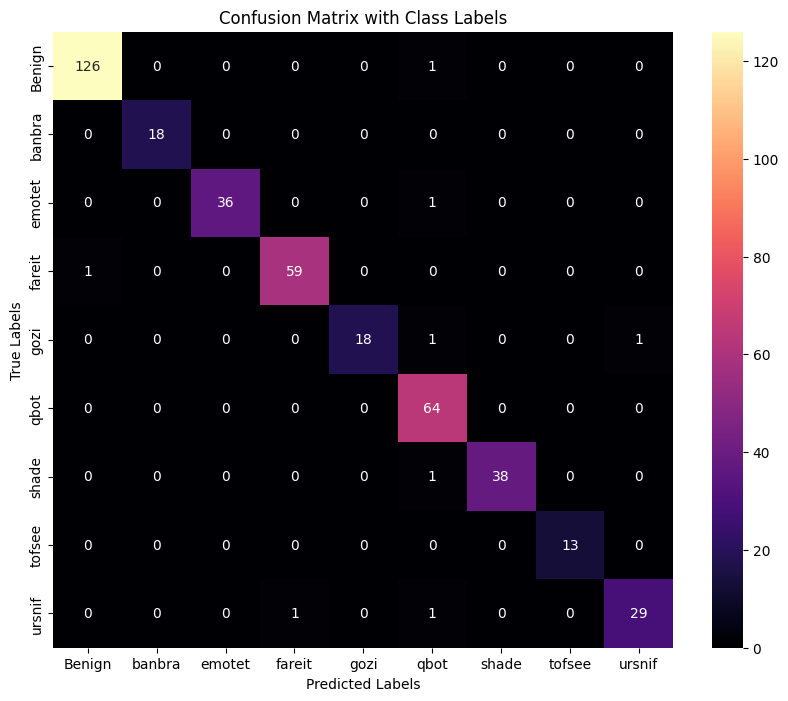

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma", xticklabels=label_mapping_train.values(), yticklabels=label_mapping_train.values())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix with Class Labels")
plt.show()